In [127]:
# Loading all packages + ignoring warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error as mse
#warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import requests
from datetime import datetime
import json
#import matplotlib

True
-----
dict length: 140
-----
True
-----
dict length: 140
-----
True
-----
dict length: 140
-----
True
-----
dict length: 140
-----
      0   1   2   3   4   5
0  2007  01  93  47  72  26
1  2007  02  84  44  56  30
2  2007  03  76  39  69  17
3  2007  04  78  36  71  16
4  2007  05  77  36  55  19
   Year Month  Average_GI_job  Average_GI_dagpenge  Average_GI_arbejdsløshed  \
0  2007    01              93                   47                        72   
1  2007    02              84                   44                        56   
2  2007    03              76                   39                        69   
3  2007    04              78                   36                        71   
4  2007    05              77                   36                        55   

   Average_GI_kontanthjælp  
0                       26  
1                       30  
2                       17  
3                       16  
4                       19  
   Year Month  Average_GI_job  Average_GI

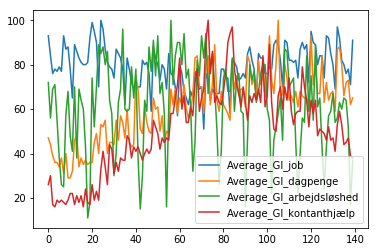

In [223]:
# Search for 'job' 2004-
#url = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222004-01-01+2018-08-26%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22job%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4QYUBiTZJun1Tk9Ech73slURKjPDR2E&tz=-120'

# Search for 'job' 2007-
url_job = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-28%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22job%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4ZTdqk6LyiG1wwdFTWY_HTaBeZrubIr&tz=-120'
url_dagpenge = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-28%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22dagpenge%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4ZeDpiQuM2jmUzRCZVgiA5cSZHbLxiU&tz=-120'
url_arbejdsløshed = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-28%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22arbejdsl%C3%B8shed%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4aIr0J86RDUIyPC_a8Qbmb9yiDShURW&tz=-120'
url_kontanthjælp = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-28%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22kontanthj%C3%A6lp%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4aJT_yiCRACo565wwsDSq0YEJSvr5eE&tz=-120'

url_list = [url_job, url_dagpenge, url_arbejdsløshed, url_kontanthjælp]

# Search for 'job' last 12 months
#url = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222017-08-26+2018-08-26%22,%22resolution%22:%22WEEK%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22job%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4QYrGUU6pWSo1zs0zJvLwLnU9iRellO&tz=-120'

combined_list = []

for j in url_list:
    response = requests.get(j)
    print(response.ok)

    print('-----')
    #print(response.text)
    dict_ = json.loads(response.text.split(")]}\',\n")[1])
    #print(dict)

    # saving length of the timelineData dict
    dict_length = len(dict_['default']['timelineData'])
    print('dict length: ' + str(dict_length)); print('-----')

    timelinedata_list = [] 

    for i in range(0,dict_length):
        # Extracting value (keyword: 'time')
        time = dict_['default']['timelineData'][i]['time']
    
        year = datetime.utcfromtimestamp(int(time)).strftime('%Y')
        month = datetime.utcfromtimestamp(int(time)).strftime('%m')
        # Extracting value (keyword: 'value'). Pulling out first element, since list with one element.
        value = dict_['default']['timelineData'][i]['value'][0]
    
    
        help_list =[]
        if j == url_list[0]:
            help_list.append(year)
            help_list.append(month)
        help_list.append(value)
        #print('help_list')
        #print(help_list)
        timelinedata_list.append(help_list)
        
    #df[j+2] = pd.DataFrame(timelinedata_list) #test_list.append(timelinedata_list)
    #print('timelinedata_list')
    #print(timelinedata_list[0:5])
    
    if j == url_list[0]:
        for l in range(0, len(timelinedata_list)):
            
            combined_list.append(timelinedata_list[l])
        #print('----combined_list first----')
        #print(combined_list)
    else:
        #print('---timelinedata_list----')
        #print(len(timelinedata_list))
        #print(timelinedata_list)
        #print('-----combined_list-----')
        #print(len(combined_list))
        #print(combined_list)
        #print('HER')
        for k in range(0,len(timelinedata_list)):
            combined_list[k].append(timelinedata_list[k][0])
        #print('---combined_list-----')
        #print(combined_list)
    
    #for k in timelinedata_list:
    #combined_list_copy = combined_list.copy()
    #combined_list = list(zip(combined_list_copy, timelinedata_list))

#print('----combined_list------')
#print(combined_list)
df = pd.DataFrame(combined_list)
print(df.head())
df.columns = ['Year', 'Month' , 'Average_GI_job','Average_GI_dagpenge', 'Average_GI_arbejdsløshed', 'Average_GI_kontanthjælp']
print(df.head())

df2 = df.groupby(['Year', 'Month'], as_index=False).mean()
print(df2.head())
print(len(df2))
df2.plot()

##out = time.strftime("%a, %d %b %Y %H:%M:%S %Z", time.localtime(test))
##print(dict['default']['timelineData'][1]['time'])
##print(dict['default']['timelineData'][1]['value'])#.keys())

##print(datetime.utcfromtimestamp(test).strftime('%m'))





In [224]:
# Number of lags for explanatory variables
n_lags = 1

# Read unemployment data from csv
unemp_rates = pd.read_excel('Bruttoledige4.xlsx')
unemp_rates['Year'] =  [x[0:4] for x in unemp_rates['Date']]
unemp_rates['Month'] =  [x[5:] for x in unemp_rates['Date']]
# Create varaible lagged unemplyment rate
df2['Bruttoledige_lag1'] = unemp_rates['Bruttoledige'].shift(n_lags)

# Create variable lagged average SVI
df3 = df2.copy()
df3['Average_SVI_lag1'] = df3['Average_SVI'].shift(n_lags)

# Removing first observation in both dataframes, sinces df3 now contains NA i first row
# Additionally ensuring that d4 and unemp_rates have the same number of columns
df4 = df3[1:len(unemp_rates)]
unemp_rates = unemp_rates[1:]

print('----unemp_rates----')
print(unemp_rates.head())
print('----df4----')
print(df4.head())
X = np.array(df4[['Average_SVI_lag1', 'Bruttoledige_lag1']]) # creating ndarray of X values (2 variables)
X_ar = np.array(df4[['Bruttoledige_lag1']]) # creating ndarray of X values (2 variables)
y = np.array(unemp_rates[['Bruttoledige']])#.reshape(-1, 1) # creating ndarray of y values


# Security check to ensure that length of variable lists match.
if (len(X)-len(y)!=0):
    print('-------------------------------------------------------------------')
    print('----WARNING: Number of observations in X and y does not match!!----')
    print('---------------Length of y: ' + str(len(y)) + '. Length of X: ' + str(len(X)) + '------------------')
    print('-------------------------------------------------------------------')
unemp_rates.plot()
print(X[0:10])
print(X_ar[0:10])
print(y[0:10])



KeyError: 'Average_SVI'

/Users/karlbindslev/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/karlbindslev/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/karlbindslev/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.001778    0.049183
dtype: float64
Lasso 0.061
   y_test    y_pred
0     5.0  4.875656
1     5.3  5.246945
2     6.6  6.402303
3     3.2  3.163617
4     6.1  5.762788


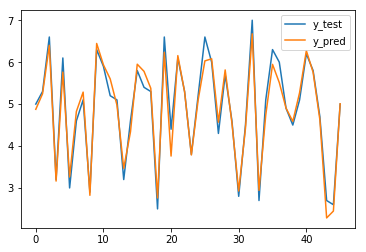

In [106]:
# ------ML part------- #
# In PolynomialFeatures(degree=p), p=2 is default - do loop as in lec 12 to try different order polys.
# Maybe do plot to show that MSE converges to zero for p+++ - overfitting

# splitting into development (2/3) and test data (1/3)
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=1/3, random_state=2)
# splitting development into train (1/3) and validation (1/3)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=1/2, random_state=2)


# ------Lasso------- #

perform = []
lambdas = np.logspace(-4, 4, 33)
for lambda_ in lambdas:
    pipe_lasso = make_pipeline(PolynomialFeatures(), 
                               StandardScaler(),
                               Lasso(alpha=lambda_, random_state=1))
    pipe_lasso.fit(X_train, y_train)
    y_pred = pipe_lasso.predict(X_val) # Transformation?
    perform.append(mse(y_pred, y_val))
    
hyperparam_perform = pd.Series(perform,index=lambdas)

optimal = hyperparam_perform.nsmallest(1)    
print(optimal) # optimal lambda

# using optimal lambda in new pipe
pipe_lasso = make_pipeline(PolynomialFeatures(), # dont use poly features for OLS
                           StandardScaler(),
                           Lasso(alpha=optimal.index[0]))

pipe_lasso.fit(X_dev,y_dev) # Fitting model to development data set using new pipe
print('Lasso', round(mse(pipe_lasso.predict(X_test),y_test), 3))
#print('LinReg', round(mse(pipe_lr.predict(X_test),y_test), 3))
y_pred = pipe_lasso.predict(X_test)
df_y_test = pd.DataFrame(y_test)
df_y_pred = pd.DataFrame(y_pred)

df_ = pd.DataFrame()
df_['y_test'] = df_y_test[0]
df_['y_pred'] = df_y_pred[0]

print(df_.head())
#df_.reset_index(drop=True)
#df_.reset_index(level=0, inplace=True)
#print(df_.head())
df_.plot()
#test = np.ndarray()



# ----- 10/5 fold CV --------#



In [107]:
# Split into continous time series

train_share = 0.4
valuation_share = 0.4
test_share = 0.2

dev_share = train_share + valuation_share

# Creating new y and X. y = first differences

## Constructing first diff y
#unemp_rates_first_diff = unemp_rates.copy()
#unemp_rates_first_diff['Bruttoledige_fd'] = unemp_rates_first_diff['Bruttoledige']-unemp_rates_first_diff['Bruttoledige'].shift(1)
#unemp_rates_first_diff = unemp_rates_first_diff[1:]
#y = np.array(unemp_rates_first_diff[['Bruttoledige_fd']])
#print(y[0:10])

#print(X[0:10])

X_dev_ts = X[:int(len(X)*dev_share)]
X_train_ts = X[:int(len(X)*train_share)]
X_val_ts = X[int(len(X)*train_share):int(len(X)*(train_share+valuation_share))]
X_test_ts = X[int(len(X)*(train_share+valuation_share)):] 

if (len(X_train_ts)+len(X_val_ts)+len(X_test_ts))!= len(X):
    print('--------WARNING LENGTHS DO NOT MATCH!!-----------')
else:
    print('len(X_dev_ts): ' + str(len(X_dev_ts)))
    print('len(X_train_ts): ' + str(len(X_train_ts)))
    print('len(X_val_ts): ' + str(len(X_val_ts)))
    print('len(X_test_ts): ' + str(len(X_test_ts)))

y_dev_ts = y[:int(len(y)*dev_share)]    
y_train_ts = y[:int(len(y)*train_share)]
y_val_ts = y[int(len(y)*train_share):int(len(y)*(train_share+valuation_share))]
y_test_ts = y[int(len(y)*(train_share+valuation_share)):] 

if (len(y_train_ts)+len(y_val_ts)+len(y_test_ts))!= len(y):
    print('--------WARNING LENGTHS DO NOT MATCH!!-----------')
else:
    print('len(y_dev_ts): ' + str(len(y_dev_ts)))
    print('len(y_train_ts): ' + str(len(y_train_ts)))
    print('len(y_val_ts): ' + str(len(y_val_ts)))
    print('len(y_test_ts): ' + str(len(y_test_ts)))

#[df.iloc[x:x+block_size] for x in np.random.randint(len(df), size=num_samples)]



len(X_dev_ts): 109
len(X_train_ts): 54
len(X_val_ts): 55
len(X_test_ts): 28
len(y_dev_ts): 109
len(y_train_ts): 54
len(y_val_ts): 55
len(y_test_ts): 28


0.056234    0.047945
dtype: float64
Lasso 0.024
            y_test    y_pred
Year_month                  
2016M03        5.4  5.304511
2016M04        5.3  5.398325
2016M05        5.1  5.304511
2016M06        4.9  5.116883
2016M07        4.9  4.929255
2016M08        5.0  4.929255
2016M09        5.1  5.023069
2016M10        5.0  5.116883
2016M11        4.9  5.023069
2016M12        5.0  4.929255
2017M01        5.3  5.023069
2017M02        5.4  5.304511
2017M03        5.1  5.398325
2017M04        4.9  5.116883
2017M05        4.7  4.929255
2017M06        4.6  4.741627
2017M07        4.5  4.647813
2017M08        4.6  4.553998
2017M09        4.5  4.647813
2017M10        4.6  4.553998
2017M11        4.4  4.647813
2017M12        4.5  4.460184
2018M01        4.3  4.553998
2018M02        4.4  4.366370
2018M03        4.4  4.460184
2018M04        4.3  4.460184
2018M05        4.3  4.366370
2018M06        4.2  4.366370


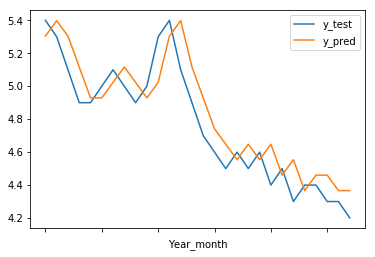

In [126]:
# ------Lasso------- #

perform = []
lambdas = np.logspace(-4, 4, 33)
for lambda_ in lambdas:
    pipe_lasso = make_pipeline(PolynomialFeatures(), 
                               StandardScaler(),
                               Lasso(alpha=lambda_, random_state=1))
    pipe_lasso.fit(X_train_ts, y_train_ts)
    y_pred_ts = pipe_lasso.predict(X_val_ts) # Transformation?
    perform.append(mse(y_pred_ts, y_val_ts))
    
hyperparam_perform = pd.Series(perform,index=lambdas)

optimal = hyperparam_perform.nsmallest(1)    
print(optimal) # optimal lambda

# using optimal lambda in new pipe
pipe_lasso = make_pipeline(PolynomialFeatures(), # dont use poly features for OLS
                           StandardScaler(),
                           Lasso(alpha=optimal.index[0]))

pipe_lasso.fit(X_dev_ts,y_dev_ts) # Fitting model to development data set using new pipe
print('Lasso', round(mse(pipe_lasso.predict(X_test_ts),y_test_ts), 3))
#print('LinReg', round(mse(pipe_lr.predict(X_test_ts),y_test_ts), 3))
y_pred_ts = pipe_lasso.predict(X_test_ts)
df_y_test_ts = pd.DataFrame(y_test_ts)
df_y_pred_ts = pd.DataFrame(y_pred_ts)

df_ts = pd.DataFrame()
df_ts['y_test'] = df_y_test_ts[0]
df_ts['y_pred'] = df_y_pred_ts[0]
df_ts['Year_month'] = np.array(unemp_rates['Date'][int(len(y)*(train_share+valuation_share)):])
df_ts.set_index('Year_month', inplace=True)
#print(len(df_ts))

print(df_ts)
#df_ts.reset_index(drop=True)
#df_ts.reset_index(level=0, inplace=True)
df_ts.plot()
#test = np.ndarray()